In [144]:
import lstm_class
import normalize_windows
import time
import matplotlib.pyplot as plt

In [145]:
#moduleを一度読み込むとメモリ上にロードされているため
#変更を反映させるためにはreloadする必要あり
import importlib
importlib.reload(lstm_class)
importlib.reload(normalize_windows)

<module 'normalize_windows' from 'C:\\Users\\hirb7\\s19148\\data_analyst\\lstm_class\\normalize_windows.py'>

In [146]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor="white")
    ax =fig.add_subplot(1,1,1)#figの配置
    ax.plot(true_data, label="True Data")
    for i,data in enumerate(predicted_data):
        padding = [None for p in range(i*prediction_len)]
        plt.plot(padding + data, label="Prediction")
        plt.legend()
    plt.show()

In [147]:
def plot_results_point_by_point(predicted_data, true_data):
    fig = plt.figure(facecolor="white")
    ax =fig.add_subplot(1,1,1)#figの配置
    ax.plot(true_data, label="True Data")
    ax.plot(predicted_data, label="prediction")
    plt.legend()
    plt.show()

In [197]:
epoch =50
seq_len=30
x_train,y_train,x_test,y_test = lstm_class.load_data("fci_gs.csv",
                                                     seq_len=seq_len,
                                                     normalize_window=True)

all_data_shape:(732, 31, 12)
learning_label_shape：(500, 3)


In [198]:
model =lstm_class.build_model([9,30,30,3])

実行時間:  0.03491091728210449


In [199]:
history=model.fit(x_train,
                  y_train,
                  batch_size=64,
                  nb_epoch=epoch,
                  validation_split=0.3)

Train on 350 samples, validate on 150 samples
Epoch 1/50
350/350 [==============================] - 4s 11ms/step - loss: 1.0956 - acc: 0.3514 - val_loss: 1.0490 - val_acc: 0.5467
Epoch 2/50
350/350 [==============================] - 0s 799us/step - loss: 1.0436 - acc: 0.4629 - val_loss: 1.0093 - val_acc: 0.5467
Epoch 3/50
350/350 [==============================] - 0s 764us/step - loss: 0.9956 - acc: 0.4943 - val_loss: 0.9954 - val_acc: 0.5467
Epoch 4/50
350/350 [==============================] - 0s 755us/step - loss: 1.0048 - acc: 0.5029 - val_loss: 0.9978 - val_acc: 0.5467
Epoch 5/50
350/350 [==============================] - 0s 758us/step - loss: 1.0139 - acc: 0.4971 - val_loss: 0.9998 - val_acc: 0.5467
Epoch 6/50
350/350 [==============================] - 0s 764us/step - loss: 0.9911 - acc: 0.4886 - val_loss: 1.0007 - val_acc: 0.5467
Epoch 7/50
350/350 [==============================] - 0s 768us/step - loss: 1.0023 - acc: 0.4771 - val_loss: 1.0000 - val_acc: 0.5467
Epoch 8/50
350/35

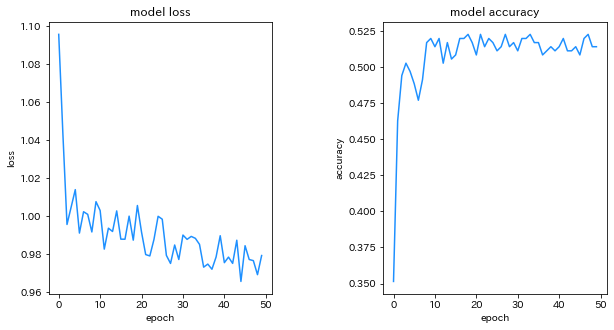

In [206]:
def plot_history_loss(fit):
    axL.plot(fit.history['loss'], label = "for training", color = 'dodgerblue')
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
import keras.backend as K

  
    
def plot_history_accuracy(fit):
    axR.plot(fit.history["acc"], label = "for training", color = 'dodgerblue')
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')

fig, (axL, axR) = plt.subplots(ncols = 2, figsize = (10,5))
plt.subplots_adjust(wspace = 0.5)
plot_history_loss(history)
plot_history_accuracy(history)
fig.savefig("loss_and_accuracy_LSTM.png", format = 'png', dpi = 300)

In [207]:
predicted = model.predict(x_test)
print(np.shape(predicted))
(np.shape(y_test))
#predicted = np.reshape(predicted, (predicted.size,))

(232, 3)


(232, 3)

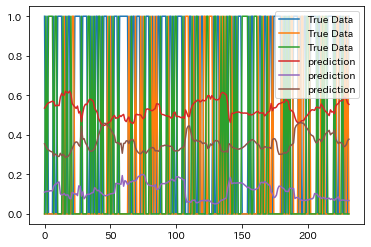

In [208]:
fig = plt.figure(facecolor="white")
ax =fig.add_subplot(1,1,1)#figの配置
ax.plot(y_test, label="True Data")
ax.plot(predicted, label="prediction")
plt.legend()
plt.show()

In [209]:
from sklearn.metrics import confusion_matrix

predict_classes = model.predict_classes(x_test)
true_classes = np.argmax(y_test, 1)
cmx = confusion_matrix(true_classes, predict_classes)
print(cmx)

[[118   0   4]
 [ 44   0   0]
 [ 66   0   0]]


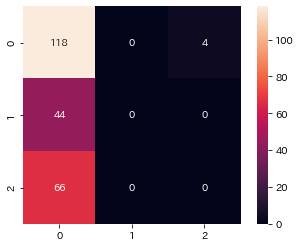

In [204]:
import seaborn as sns
sns.heatmap(cmx, annot=True, fmt='g', square=True)
plt.show()

In [205]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

print(classification_report(true_classes, predict_classes))

# from sklearn.metrics import f1_score
# print(f1_score(y_test, predicted))

              precision    recall  f1-score   support

           0       0.52      0.97      0.67       122
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        66

    accuracy                           0.51       232
   macro avg       0.17      0.32      0.22       232
weighted avg       0.27      0.51      0.35       232



In [195]:
   def compare_TV(history):
        import matplotlib.pyplot as plt

        # Setting Parameters
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs = range(len(acc))

        # 1) Accracy Plt
        plt.plot(epochs, acc, 'bo' ,label = 'training acc')
        plt.plot(epochs, val_acc, 'r' , label= 'validation acc')
        plt.title('Training and Validation acc')
        plt.legend()

        plt.figure()

        # 2) Loss Plt
        plt.plot(epochs, loss, 'bo' ,label = 'training loss')
        plt.plot(epochs, val_loss, 'r' , label= 'validation loss')
        plt.title('Training and Validation loss')
        plt.legend()

        plt.show()


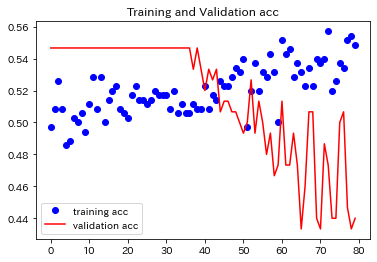

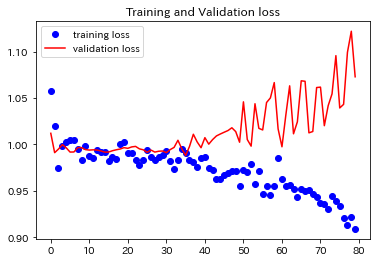

In [196]:
compare_TV(history)

IndexError: too many indices for array

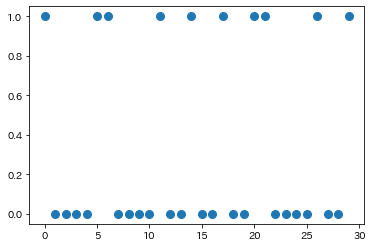

In [172]:
#pred = model.predict(xdata)
predict_classes = model.predict_classes(x_test)

fig, ax = plt.subplots()
ax.plot(y_test[:10, :].reshape(-1), linewidth=0, marker="o", markersize=8)
ax.plot(predict_classes[:10, :].reshape(-1), linewidth=0, marker="o", markersize=5)
ax.set_xticks(np.arange(0, 20, 2))
ax.set_yticks([-2, 0, 2])
ax.legend(["training", "prediction"])
ax.grid()
plt.show()